# Performance of models optimized with Grid Search

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

sns.set_theme()
sns.set_palette('bright')

In [2]:
X_train = pd.read_csv('..\data_files\X_train.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('..\data_files\y_train.csv').drop('Unnamed: 0', axis=1)
X_test = pd.read_csv('..\data_files\X_test.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('..\data_files\y_test.csv').drop('Unnamed: 0', axis=1)

In [3]:
models_dict = {}
model_names = ['ridge','mlpregressor','randomforestregressor','xgbregressor']

for i, path in enumerate(model_names):
    file = open(f'../models/pickled/optimized_{path}.pickle', 'rb')
    model = pickle.load(file)
    file.close()
    models_dict[model_names[i]] = model

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Changing display format to make results more readable

results = {}

for model in models_dict:
    r2_train = r2_score(y_train, models_dict[model].predict(X_train))
    r2_test = r2_score(y_test, models_dict[model].predict(X_test))
    mse_train = mean_squared_error(y_train, models_dict[model].predict(X_train))
    mse_test = mean_squared_error(y_test, models_dict[model].predict(X_test))
    results[model] = [r2_train, r2_test, mse_train, mse_test]

results_frame = pd.DataFrame(data=results).transpose().reset_index()
results_frame.columns = ['Model','R2_score_train', 'R2_score_test', 'MSE_train', 'MSE_test']
results_frame

,Model,R2_score_train,R2_score_test,MSE_train,MSE_test
0,ridge,0.667,0.673,2411401374.370,2284554077.424
1,mlpregressor,0.681,0.688,2310537053.109,2179176009.145
2,randomforestregressor,0.929,0.884,512030795.366,808127500.276
3,xgbregressor,0.954,0.896,330903819.417,726273632.080


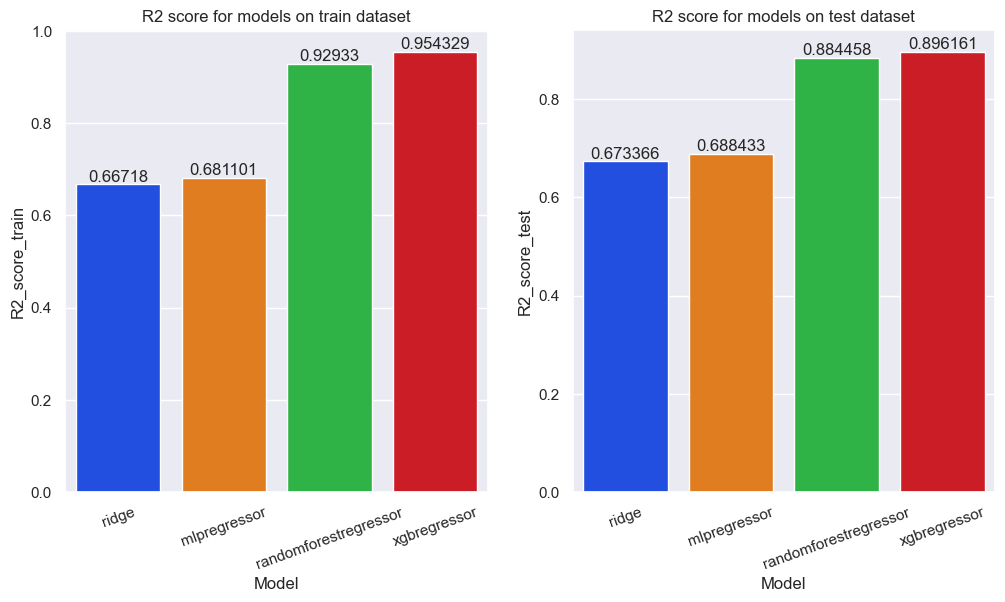

In [5]:
plt.figure(figsize=(12, 6))

for i, data in enumerate(['train', 'test']):
    plt.subplot(1, 2, i+1)
    ax = sns.barplot(data=results_frame, x='Model', y=f'R2_score_{data}')
    plt.xticks(rotation=20)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.title(f"R2 score for models on {data} dataset")

plt.show()

Random forest and XGBoost regressor models seem to perform much better.

In [6]:
prices_real_vs_predicted = pd.DataFrame(data=[np.array(y_test)
                                              .reshape(-1,), 
                                              np.array(models_dict['xgbregressor'].predict(X_test))
                                              .reshape(-1,)], index=['Real_price', 'Predicted_price']).transpose()

prices_real_vs_predicted

,Real_price,Predicted_price
0,173000.000,214410.375
1,48000.000,34929.605
2,99900.000,93972.531
3,104800.000,130456.141
4,231570.000,227122.156
...,...,...
23581,167400.000,168048.172
23582,84400.000,90800.516
23583,62500.000,69292.219
23584,34900.000,37580.527


Let's see how XGBRegressor (best performing model) predicts car prices on some sample of unseen data.

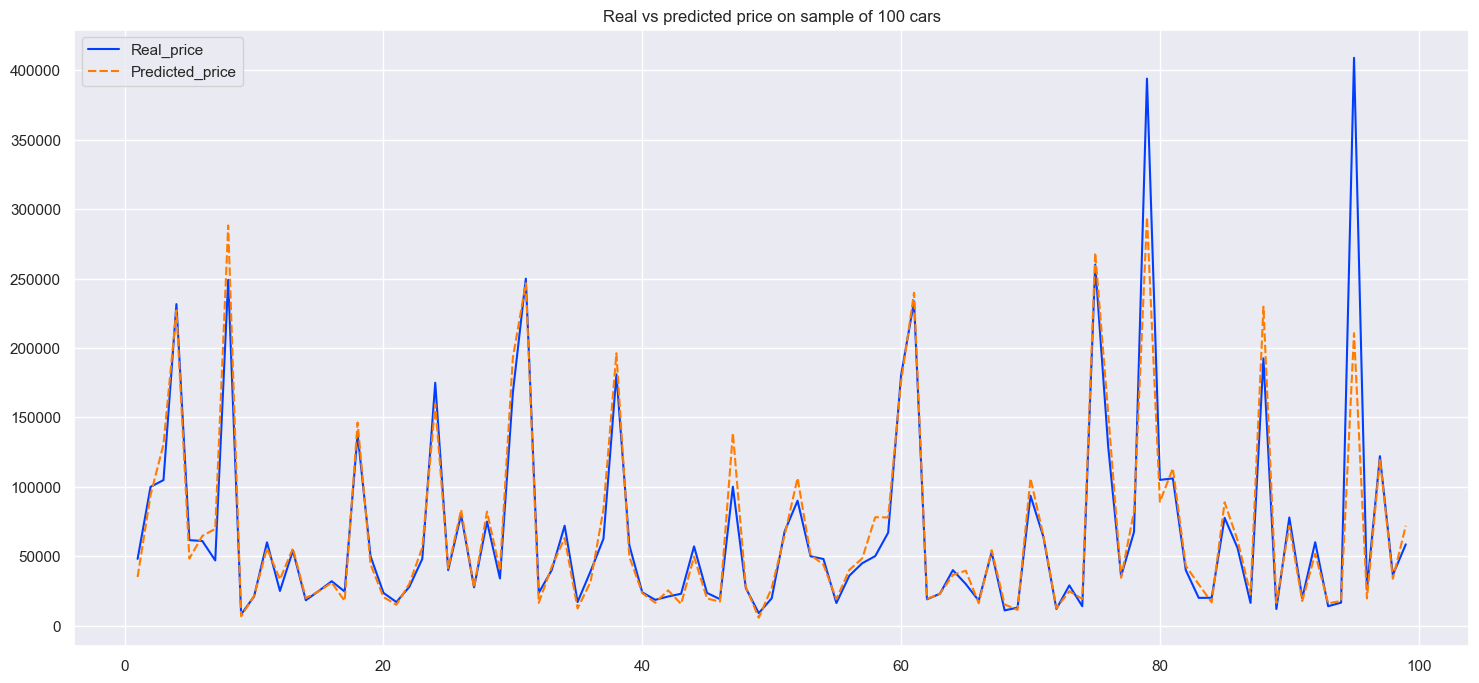

In [7]:
plt.figure(figsize=(18,8))
sns.lineplot(data=prices_real_vs_predicted.iloc[1:100])
plt.title("Real vs predicted price on sample of 100 cars")
plt.show()